In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cleaning the Data

In [2]:
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
df = pd.read_csv(url, skiprows=22)
df.head(3)

C:\Users\lourd\AppData\Local\Temp\ipykernel_4384\1429274394.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=22)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [3]:
print(df.columns.tolist())

['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt']


In [16]:
fields = ['date', 'temp', "wdsp"]
df = pd.read_csv(url, skiprows=22, usecols = fields)
df.head(3)

C:\Users\lourd\AppData\Local\Temp\ipykernel_4384\1281008473.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=22, usecols = fields)


,date,temp,wdsp
0,10-apr-1996 14:00,11.5,0
1,31-jul-1996 08:00,11.5,0
2,31-jul-1996 09:00,11.6,0


In [17]:
df["date"]

0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
255685    30-sep-2025 20:00
255686    30-sep-2025 21:00
255687    30-sep-2025 22:00
255688    30-sep-2025 23:00
255689    01-oct-2025 00:00
Name: date, Length: 255690, dtype: object

In [18]:
pd.to_datetime(df['date'])
df["date"]= pd.to_datetime(df['date'])
df.head(5)

C:\Users\lourd\AppData\Local\Temp\ipykernel_4384\2499527110.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['date'])
C:\Users\lourd\AppData\Local\Temp\ipykernel_4384\2499527110.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"]= pd.to_datetime(df['date'])


,date,temp,wdsp
0,1996-04-10 14:00:00,11.5,0
1,1996-07-31 08:00:00,11.5,0
2,1996-07-31 09:00:00,11.6,0
3,1996-07-31 10:00:00,12.9,0
4,1996-07-31 11:00:00,14.5,0


Explain Chat GPT here and the warning I got there

In [19]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M', errors='coerce')
df.head(5)

,date,temp,wdsp
0,1996-04-10 14:00:00,11.5,0
1,1996-07-31 08:00:00,11.5,0
2,1996-07-31 09:00:00,11.6,0
3,1996-07-31 10:00:00,12.9,0
4,1996-07-31 11:00:00,14.5,0


References:
>
- https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
- https://chatgpt.com/share/69075102-8d88-800b-b2a2-196dd62e53bd

### Plotting the Temperature

<Axes: xlabel='date'>

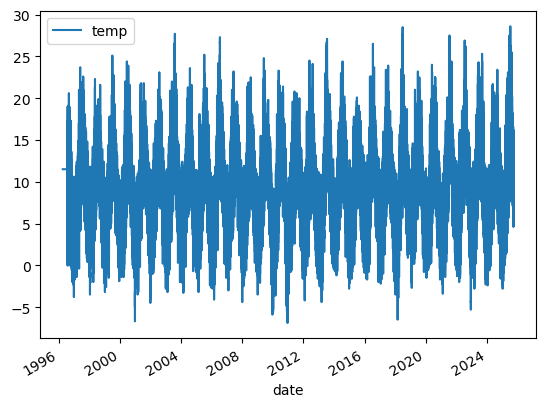

In [20]:
xvalues='date'
yvalues = ['temp']
df.plot(x=xvalues, y=yvalues)

References:
>
- https://stackoverflow.com/questions/72780440/how-to-plot-local-date-and-time-vs-temperature-from-csv-file-that-uses-utc-for-d - Idea for type of plot

<Axes: title={'center': 'Temperature (Hourly)'}, xlabel='Date', ylabel='Temperature (°C)'>

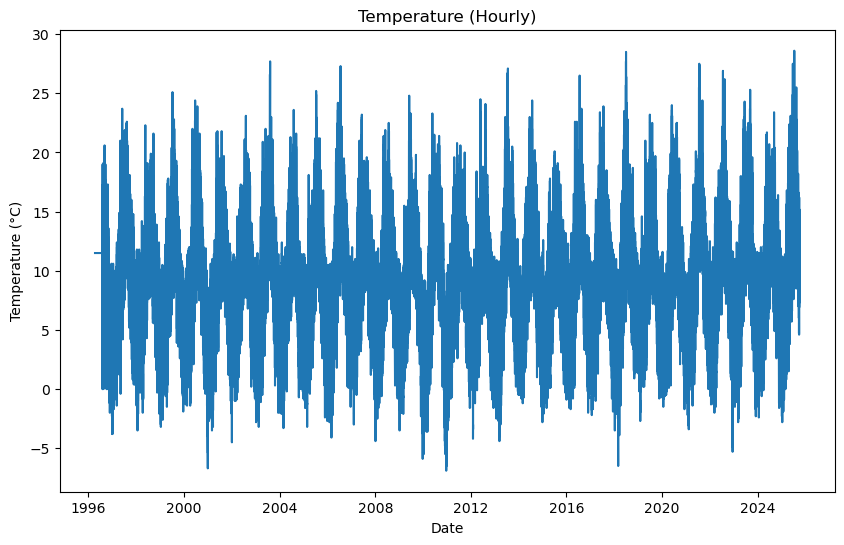

In [21]:
# Made it prettier with Seaborn
plt.figure(figsize=(10, 6))
plt.title("Temperature (Hourly)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
sns.lineplot(x='date', y='temp', data=df)

References:
>
- https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial
- https://seaborn.pydata.org/generated/seaborn.lineplot.html

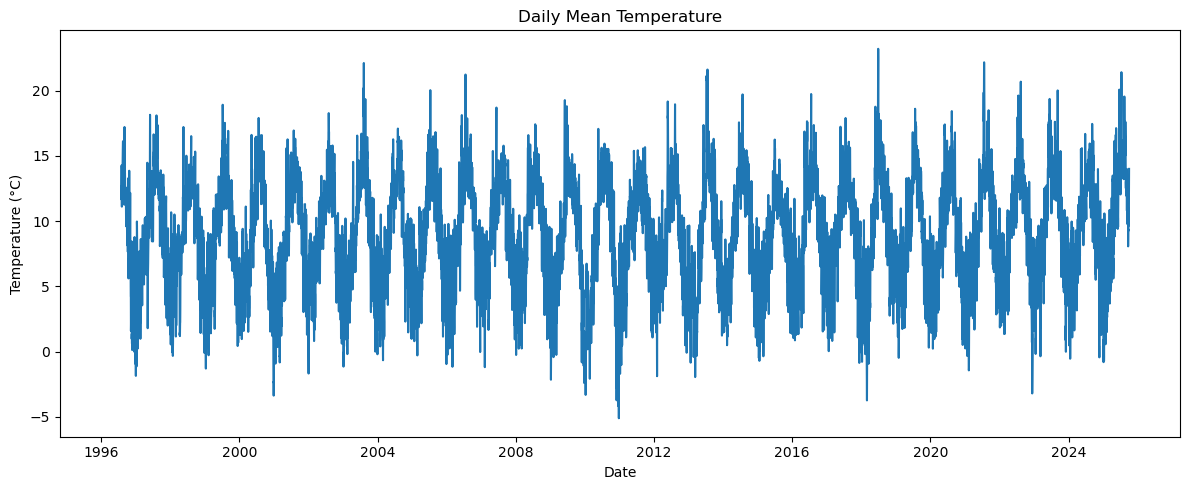

In [22]:

daily = df.resample('D', on='date').agg({'temp': ['mean']})

plt.figure(figsize=(12, 5))
plt.plot(daily.index, daily[('temp', 'mean')])
plt.title("Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

References:
>
- https://medium.com/@whyamit101/understanding-pandas-resample-with-simple-examples-6c58cc252fbd

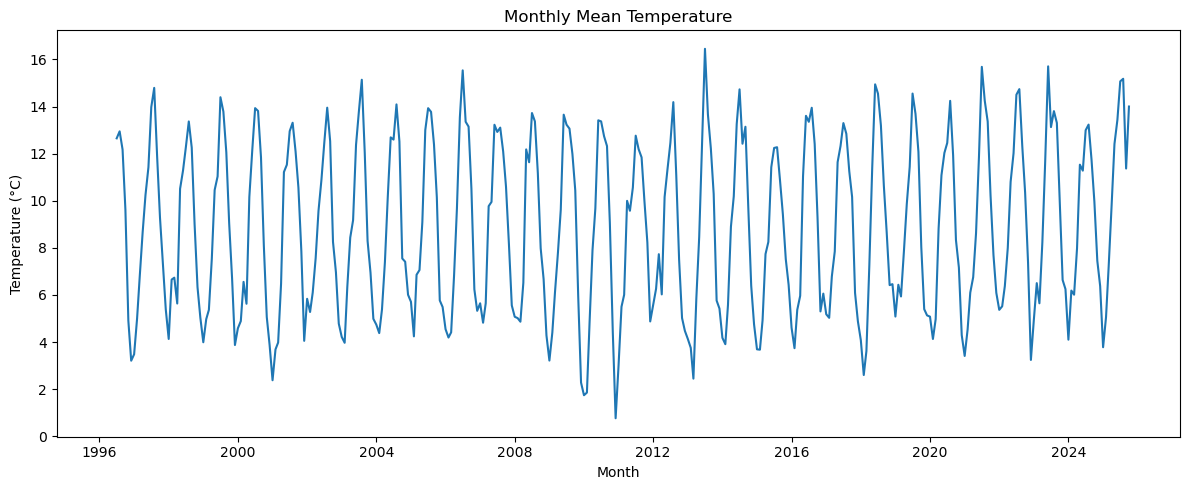

In [23]:
monthly = df.resample('MS', on='date').agg({'temp': ['mean']})

plt.figure(figsize=(12, 5))
plt.plot(monthly.index, monthly[('temp', 'mean')])
plt.title("Monthly Mean Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()

### Plotting the Windspeed